# CSE152B: Homework 3
## Computing Resources
Please read the README file of this repository for the instructions
## Instructions
1. Attempt all questions.
2. Please comment all your code adequately.
3. Include all relevant information such as text answers, output images in notebook.
4. **Academic integrity:** The homework must be completed individually.

5. **Submission instructions:**  
 (a) Submit the notebook and its PDF version on Gradescope.  
 (b) Rename your submission files as Lastname_Firstname.ipynb and Lastname_Firstname.pdf.  
 (c) Correctly select pages for each answer on Gradescope to allow proper grading.

6. **Due date:** Thu, Jun 4, at 4pm PST

## Q1: UNet for Image Segmentation

``ALL the scripts here should be run from ./Segmentation``

1. **Check the codes in `Segmentation`.** In this homework, we have provided the training script, the evaluation code, 3 verisons of the UNet structures and some useful functions. You will be asked to test out different variations of network structures and report their performance on the test set. The provided codes include:
    1. `test.py`: The file for evaluation. 
    2. `dataLoader.py`: The file to load the data for training and testing.  
    3. `model.py`: The file for models. The residual block (`ResBlock`) and the code to load pretrained weights of `resnet18` are given as `loadPretrainedWeight`. The basic encoder and decoder (`encoder` and `decoder`), as well as the ones with dilation/SPP (`encoderDilation` and `decoderDilation`) are also given. 
    4. `colormap.mat`: The color map used to visualize segmentation results. 
    5. `utils.py`: The file for some useful functions. The `computeAccuracy` function computes the unnormalized confusion matrix of each batch of labels. The `save_label` function turns the label into an image using the given color map and saves the image at the assigned location. Also see `test.py` for how these two functions are being used. 
    6. `train.py`: The file of the training script. 

**The network structures.**  There are 3 versions of UNet structures. In all three versions,  the `resnet18` structure before average pooling and fully connected layer is be used as the building block for encoder. 

1. `Basic UNet`: Please see `encoder` and `decoder` class in `model.py`. The `encoder` comes from `resnet18` and the decoder consists of transpose convolutional layers and bilinear interpolation layers so that the final output will be of the same size as the image. Skip links are added to help the network recover more details. 

2. `UNet with dilation`: We modify the encoder to a dilated `resnet18` as described in Section 2 of [1]. We set the stride of the last 4 residual blocks to be 1 so that the highest level feature maps will be $4\times 4$ times larger. To increase the receptive field, we set the dilation of residual blocks that are fourth and third from the end to be 2, while the dilation of the residual blocks that are first and second from the end are set to 4.  The new encoder and decoder are implemented under class `encoderDilation` and `decoderDilation`.

3. `UNet with dilation and pyramid pooling`:  Based on the encoder-decoder structure with dilation, pyramid pooling layer is added after the last residual block of encoder.  The pyramid pooling layer has been implemented following [2]. Notice that after adding the pyramid layer, the number of channels of the output feature to the first transpose convolutional layer will change from 512 to 1024. The new encoder and decoder are implemented under classes `encoderDilation` and `decoderDilation` (isSpp = True), respectively.

**How the networks are trained.** The networks are trained using 1464 images from the training set of PASCAL VOC 2012. 

For example to train with dilation and SPP the following script is used:

```python
python train.py --isDilation --isSpp --nepoch 200 --isPretrained True --experiment checkpoints/unet_original_zq
```

2. **Answer the following questions:**
    1. Describe the loss function that is used to train the semantic segmentation network. **[10 points]**
    2. Evaluate the trained models of `Basic UNet`, `UNet with dilation`, `UNet with dilation and pyramid pooling` provided as checkpoints using the following commands. Draw a table to summarize quantitative performances of the 3 variations of the UNet structure. The table should include the IoU for each of the 21 categories of objects and the mean IoU across all categories. The testing mean IoU of 21 categories of object will saved to `.npy` files following the last line of `test.py`. You can make changes to `test.py` if necessary. **[10 points]** :
        1. `Basic UNet`: You should load the pre-trained model with --modelRoot.
        
    ```python
    python test.py --experiment checkpoints/unet_original_zq --modelRoot /datasets/cse152-252-sp20-public/unet_checkpoints/unet_original_zq --epochId 181
    ```

        2. `UNet with dilation`: 
        
    ```python
    python test.py --experiment checkpoints/unet_original_zq_dilation --isDilation --modelRoot /datasets/cse152-252-sp20-public/unet_checkpoints/unet_original_zq --epochId 180
    
    ```
        3. `UNet with dilation and pyramid pooling`: 
        
    ```python
    python test.py --experiment checkpoints/unet_original_zq_spp --isSpp --modelRoot /datasets/cse152-252-sp20-public/unet_checkpoints/unet_original_zq --epochId 180
            
    ```
    5. Make a figure for qualitative comparisons of the 3 methods, shown on 4 different input images. Please show the segmentation results for the same image but different networks so the differences can be compared. Briefly describe the results you obtain and any observations. **[10 points]** 
    6. Explain your observations in terms of: (i) what choices helped improve the accuracy and (ii) what other steps could have been tried to further improve accuracy?  **[10 points]**
    
    `../modelsOrSomething/unet_checkpoints/unet_original_zq/`
    

``Answer Q1.2.A here``

``Ans: The loss appears to be a standard cosine loss``

``Answer Q1.2.B here``

| basicUNet | Dilated   | Spp       |             |
|-----------|-----------|-----------|-------------|
| 88.161041 | 87.666138 | 87.961693 |             |
| 68.208473 | 66.715889 | 67.075638 |             |
| 40.346836 | 35.982994 | 31.565393 |             |
| 59.690624 | 58.382736 | 69.051147 |             |
| 44.953018 | 43.007492 | 50.104874 |             |
| 49.760925 | 49.853497 | 48.774307 |             |
| 67.941658 | 70.032684 | 73.958046 |             |
| 67.809280 | 64.472733 | 70.541321 |             |
| 66.036324 | 66.236382 | 75.060776 |             |
| 18.772741 | 15.636020 | 17.255945 |             |
| 51.871513 | 44.443867 | 54.264740 |             |
| 37.105804 | 34.480053 | 41.587036 |             |
| 58.511105 | 57.098553 | 65.056213 |             |
| 45.571720 | 45.254017 | 54.666157 |             |
| 60.552711 | 58.978264 | 67.300026 |             |
| 75.601768 | 73.563438 | 73.993210 |             |
| 36.959396 | 36.058357 | 40.310631 |             |
| 55.017632 | 56.159626 | 70.980904 |             |
| 33.904175 | 28.501019 | 34.870815 |             |
| 47.314457 | 47.367546 | 50.933197 |             |
| 0.000000  | 0.000000  | 0.000000  |             |
| 51.147198 | 49.518631 | 54.538673 | <- Averages |

``Answer Q1.2.C here``

Regular
<div>
    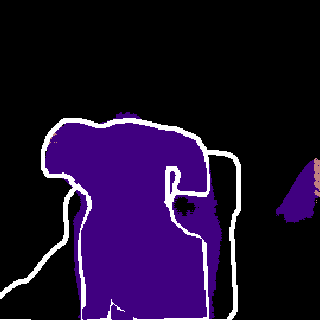
    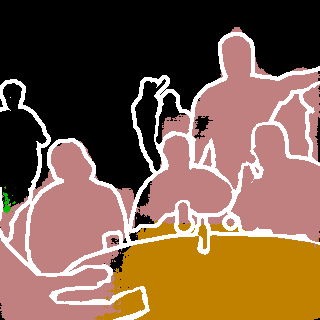
    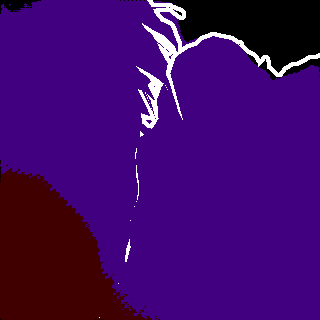
    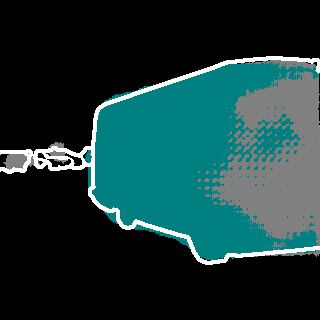
</div>
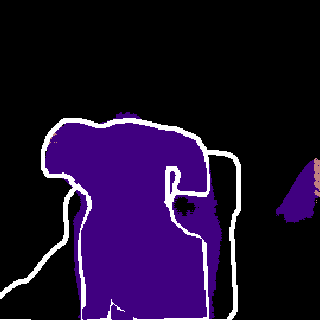
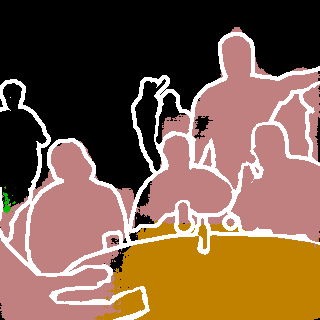
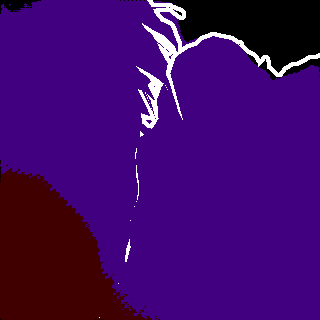
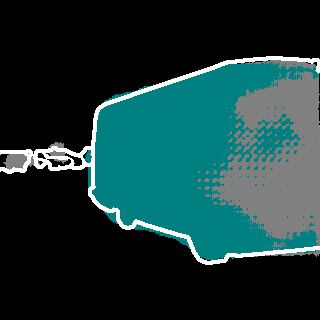

Dilation
<div>
    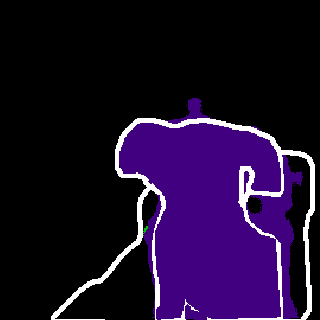
    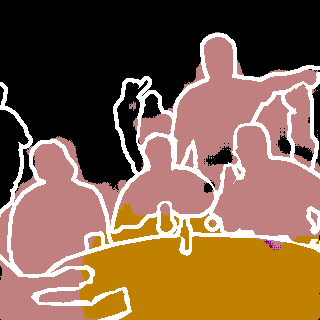
    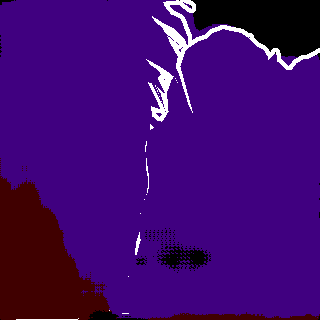
    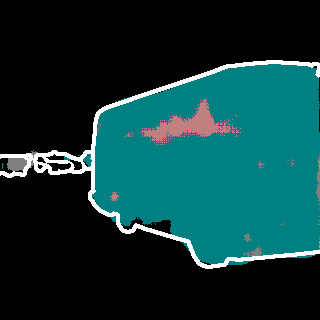
</div>
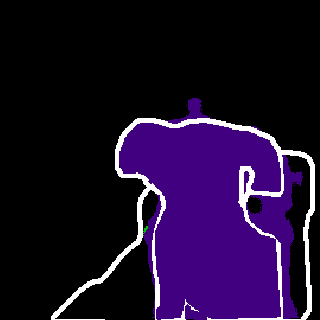
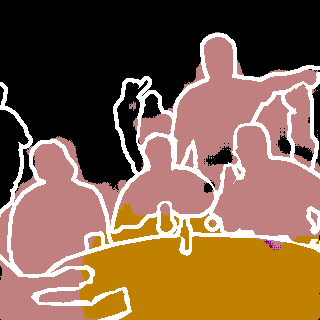
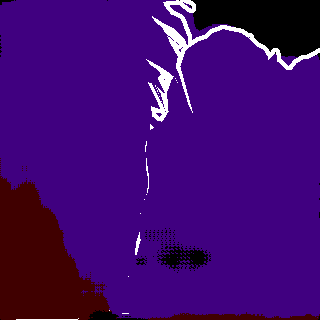
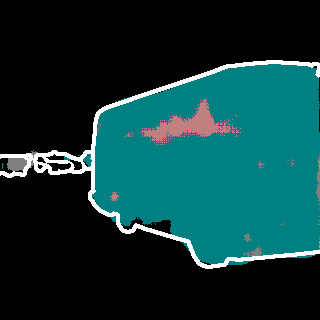

SPP
<div>
    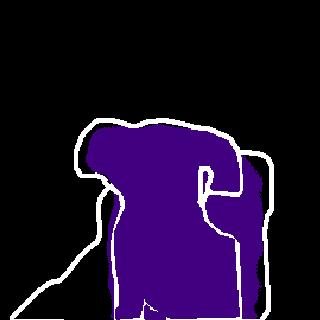
    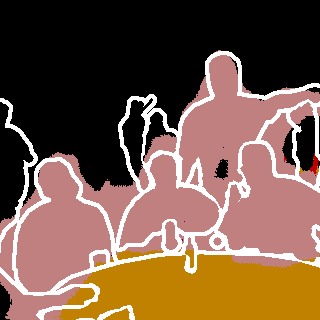
    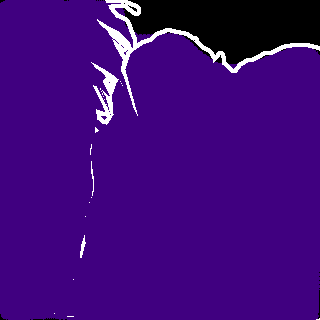
    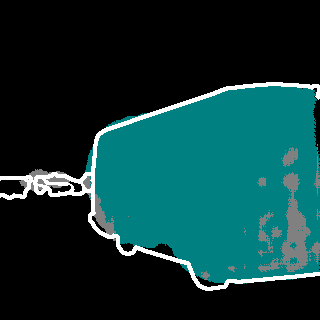
</div>
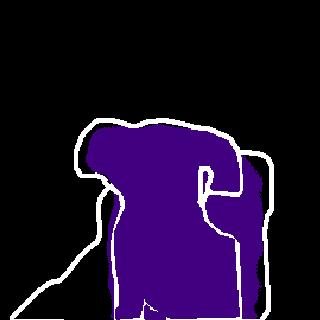
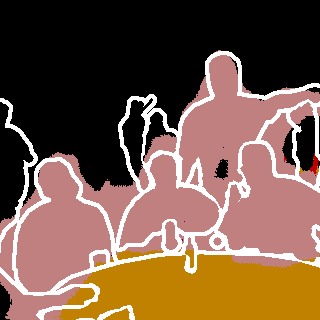
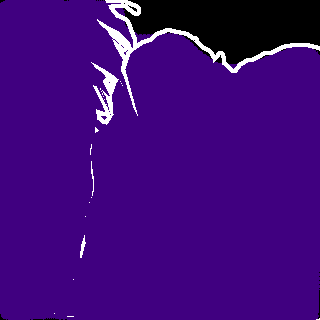
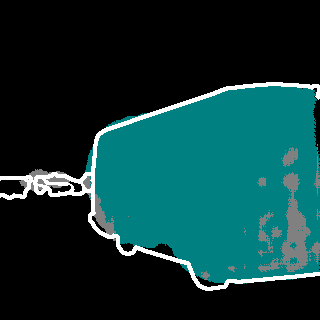

`Ans: One thing I noticed was that spp segmentation seems to be able to reason better about objecta that are really close, such as the close up dog one, as it is the closest one to the ground truth. Another interesting thing is that all of the machines seem to not like overlapping segments, the basic one can barely reason some overlapping, but it is not very good.`

``Answer Q1.2.D here``

Ans: The choices that helped improve the accuracy seemed to be the dilation, and the reasoning at multiple resolutions in the spp. One thing that could possibly make this improve would be to combine the two tactics.

## Q2: SSD [3] Object Detection

1. **Check the codes in `Detection`.** The codes are modified from ``https://github.com/amdegroot/ssd.pytorch``. Run `eval.py` code to get the object detection average precision (AP) on the PASCAL VOC 2012 dataset. The model is already trained on the PASCAL VOC 2012 object detection dataset. Draw a table in your report summarizing the AP of all 20 object categories and their mean.   **[10 points]**

``Answer Q2.1 here`` 

`
AP for aeroplane = 0.7818
AP for bicycle = 0.7200
AP for bird = 0.6477
AP for boat = 0.4651
AP for bottle = 0.3866
AP for bus = 0.7714
AP for car = 0.6852
AP for cat = 0.8264
AP for chair = 0.4571
AP for cow = 0.6483
AP for diningtable = 0.5567
AP for dog = 0.7803
AP for horse = 0.7255
AP for motorbike = 0.7716
AP for person = 0.7421
AP for pottedplant = 0.3492
AP for sheep = 0.6679
AP for sofa = 0.5870
AP for train = 0.7815
AP for tvmonitor = 0.6457
Mean AP = 0.6499
`

2. **Answer the following questions:**
    1.  Briefly explain how average precision is computed for PASCAL VOC 2012 dataset. Please check the code ($\mathtt{eval.py:~Line~163-191}$) since there are different ways to compute average precision. **[10 points]** 
    2. Explain how SSD can be much faster compared to Faster RCNN [4]? **[10 points]**
    3. Usually the number of negative bounding boxes (boxes without any object) is much larger than the number of positive bounding boxes. Explain how this imbalance is handled in SSD and Faster RCNN, respectively. **[10 points]**

``Answer Q2.2.A here``

`The average precision is computed by taking the overlapping regions of the guess with the ground truth, and computing first the true positive and false positive rate. Then they divide the true positivie rate by the sum of the tp and fp rates.`

``Answer Q2.2.B here``

`The reason why SSD is faster than Faster RCNN, is because of the fact that ssd computes the entire feature map once, and then crops the feature map to get its evaluations. Whereas faster rcnn, the crop the input and comput feature maps on all of the individual crops, which is more expensive in terms of compute power.`

``Answer Q2.2.C here`` 

`In Faster RCNN, the negative bounding boxes are limited because there are predetermined points with 9 different boxes set up at each point. due to these restrictions, the amount of negative bounding boxes are limited to the number of points. As for the SSD, there are proposal regions that are trransformed to a normalized output.`

3. Randomly pick up some images from the PASCAL VOC 2012 dataset and some from other sources. Visualize the bounding box prediction results and include a figure in your report. You can use the code in folder $\mathtt{demo}$ for visualization. **[10 points]**

``Answer Q2.3 here`` 

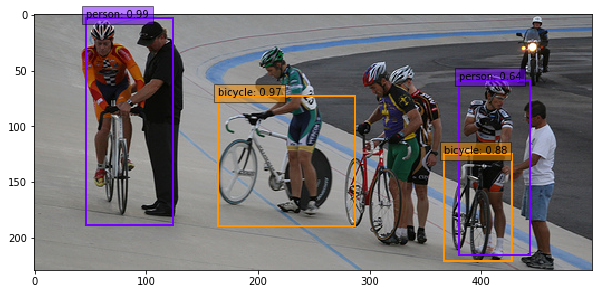

## References
1. Yu, Fisher, and Vladlen Koltun. "Multi-scale context aggregation by dilated convolutions." arXiv preprint arXiv:1511.07122 (2015).
2. Zhao, Hengshuang, et al. "Pyramid scene parsing network." Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.
3. Liu, Wei, et al. "Ssd: Single shot multibox detector." European conference on computer vision. Springer, Cham, 2016.
4.  Ren, Shaoqing, et al. "Faster r-cnn: Towards real-time object detection with region proposal networks." Advances in neural information processing systems. 2015.